In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1. 
- Investigate how the time taken varies with the size of the message (length of names). You should fill in your results in Table 1. What is the asymptotic bandwidth for large messages? <br><br>

- Plot a graph of time against message size to determine the latency (i.e. the time taken for a message of zero length); plot a graph of the bandwidth to see how this varies with message size.

In [45]:
# Table1 [ size | iterations | total time | time per message | Bandwidth (Bytes/s)]
# NOTE: time per message incudes the time of sending 1 integer (number of iterations)

data = np.loadtxt('out.txt', delimiter = '\t')
data = pd.DataFrame(data, columns=["Size(Bytes)", "Iterations", 
                                   "Total time", "Time per message", 
                                   "Bandwidth(Bytes/s)"])
data.tail(5)

,Size(Bytes),Iterations,Total time,Time per message,Bandwidth(Bytes/s)
6,13056.0,1578693.0,20.000028,0.000013,982.827518
7,26112.0,1210751.0,20.000079,0.000017,1507.520925
8,52224.0,848442.0,20.000025,0.000024,2112.816793
9,104448.0,590260.0,20.000017,0.000034,2939.768986
10,208896.0,294952.0,20.000062,0.000068,2937.989330


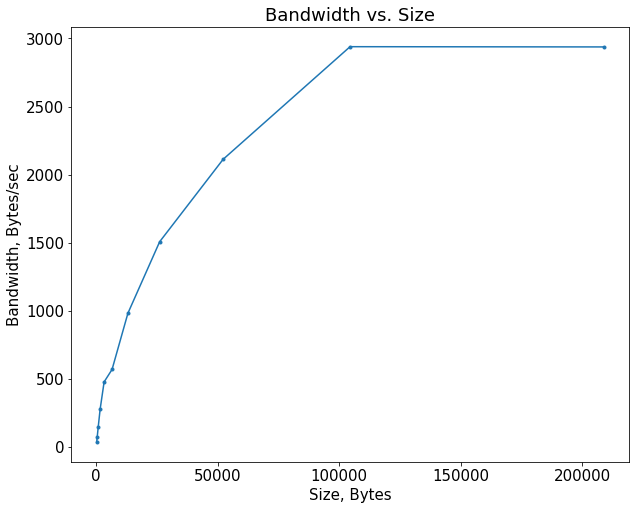

In [47]:
# plot the bandwidth vs time. 
plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = 15.0
plt.plot(data["Size(Bytes)"], data["Bandwidth(Bytes/s)"], '.-')
plt.xlabel("Size, Bytes")
plt.ylabel("Bandwidth, Bytes/sec")
plt.title("Bandwidth vs. Size")
plt.show()

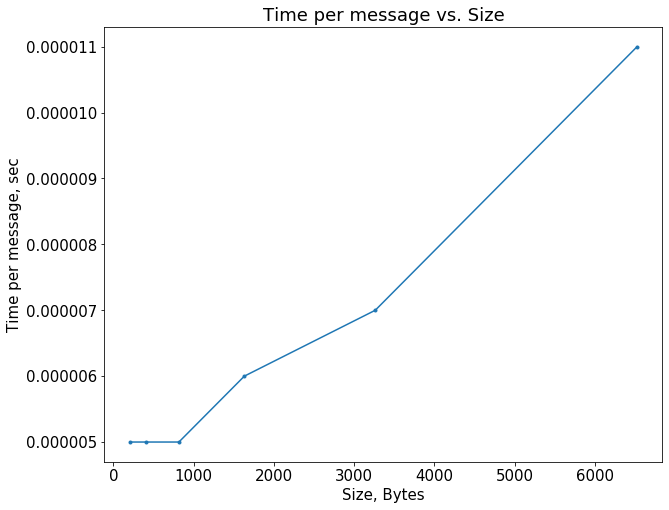

In [48]:
# plot the length of message vs time. 

plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = 15.0
plt.plot(data["Size(Bytes)"][:6], data["Time per message"][:6], '.-')
plt.xlabel("Size, Bytes")
plt.ylabel("Time per message, sec")
plt.title("Time per message vs. Size")
plt.show()

### Conclusion
- Asymptotic bandwidth for large messages is ~2940 MB/sec.
- Latency is  $5\cdot10^{-6}$ sec, this amount of time is needed to send small messages. 

### 2. 
#### Sequential version
```a.out rule_number condition```

- Constant boundary conditions

In [29]:
data_auto = np.loadtxt('out_auto.txt')

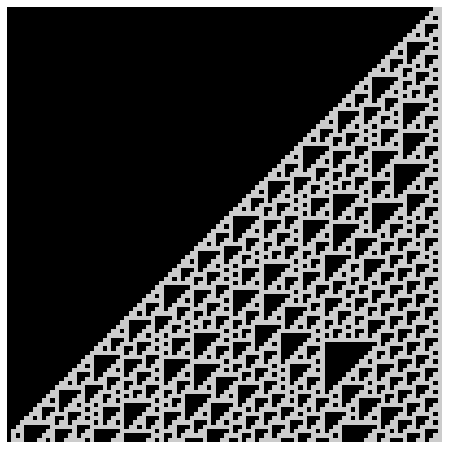

In [19]:
# rule 110, initial conditions: impulse from the right side
plt.figure(figsize=(10, 8))
plt.imshow(data_auto, cmap='nipy_spectral')
plt.axis("off")
plt.show()

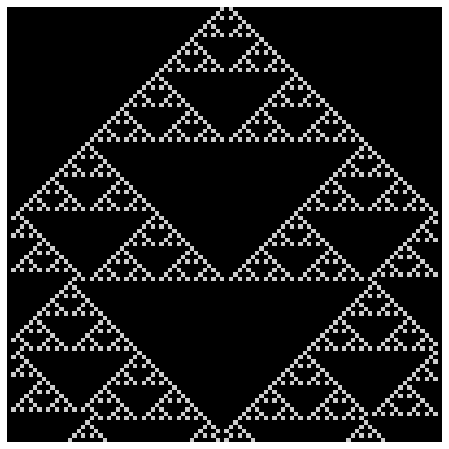

In [22]:
# rule 90, initial conditions: impulse from the centre 
plt.figure(figsize=(10, 8))
plt.imshow(data_auto, cmap='nipy_spectral')
plt.axis("off")
plt.show()

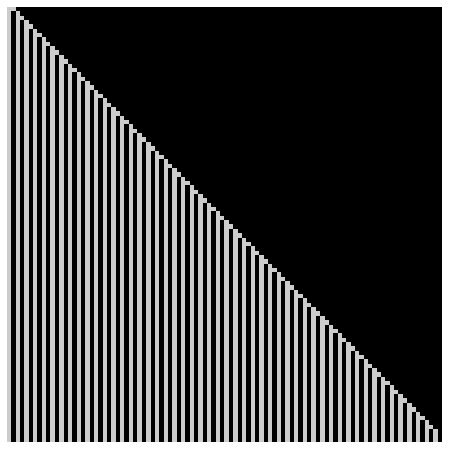

In [26]:
# rule 30, initial conditions: impulse from the left side 
plt.figure(figsize=(10, 8))
plt.imshow(data_auto, cmap='nipy_spectral')
plt.axis("off")
plt.show()

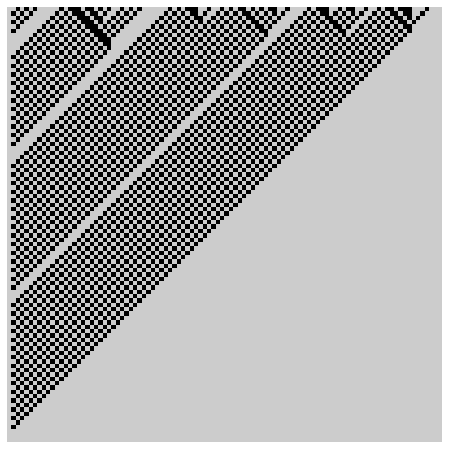

In [41]:
# rule 184, initial conditions: random positions
data_auto = np.loadtxt('out_auto.txt')

plt.figure(figsize=(10, 8))
plt.imshow(data_auto, cmap='nipy_spectral')
plt.axis("off")
plt.show()

- Periodic boundary conditions

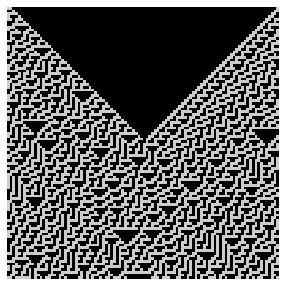

In [45]:
# rule 30, initial conditions: impulse from the left side 
data_auto = np.loadtxt('out_auto.txt')

plt.figure(figsize=(5, 5))
plt.imshow(data_auto, cmap='nipy_spectral')
plt.axis("off")
plt.show()

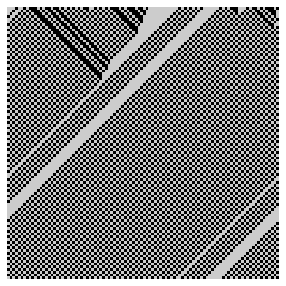

In [43]:
# rule 184, initial conditions: random_positions
data_auto = np.loadtxt('out_auto.txt')

plt.figure(figsize=(5, 5))
plt.imshow(data_auto, cmap='nipy_spectral')
plt.axis("off")
plt.show()

#### Parallel version

```mpirun --oversubscribe -np 4 a.out rule_number constant```

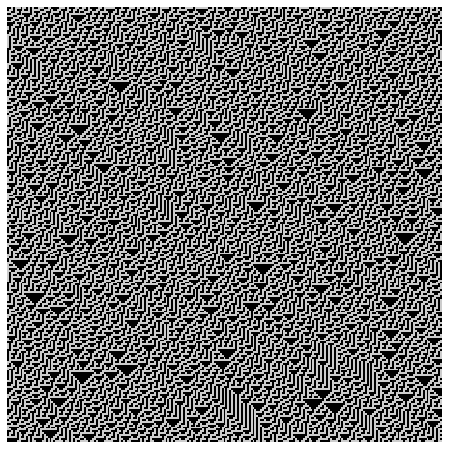

In [57]:
# rule 30, initial conditions: random_positions
data_auto = np.loadtxt('out_auto.txt', dtype='int64')

plt.figure(figsize=(8, 8))
plt.imshow(data_auto, cmap='nipy_spectral')
plt.axis("off")
plt.show()

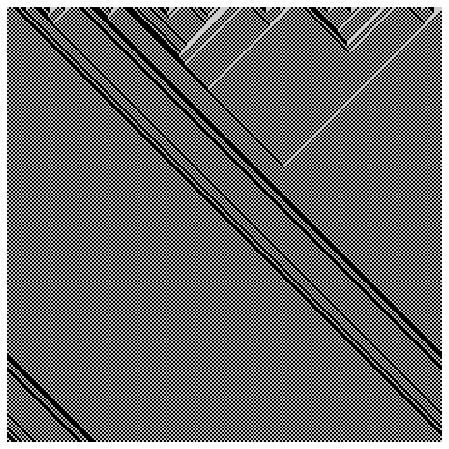

In [56]:
# rule 184, initial conditions: impulse from the left side 
data_auto = np.loadtxt('out_auto.txt', dtype='int64')

plt.figure(figsize=(8, 8))
plt.imshow(data_auto, cmap='nipy_spectral')
plt.axis("off")
plt.show()

### Speedup 
```mpirun --oversubscribe -np 4 a.out rule_number number_elements``` <br>
```./run_automata.sh``` $ \rightarrow $ to create files with times

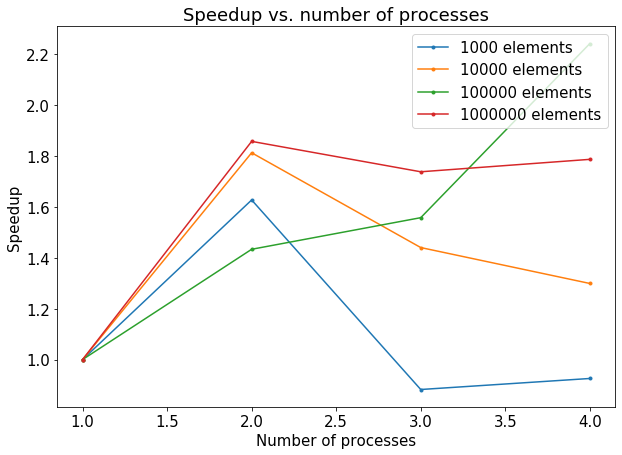

In [85]:
# 1000 iterations

plt.figure(figsize=(10, 7))
plt.rcParams['font.size'] = 15.0
filename = "out_0"
elements = str(1000)

for i in range(1, 5):
    data = np.loadtxt(filename, delimiter='\t')
    plt.plot(data[:, 0], data[0, 1]/data[:, 1], '.-', label="{} elements".format(elements))
    filename = filename + str(i)
    elements = elements + str(0)

plt.xlabel("Number of processes")
plt.ylabel("Speedup")
plt.title("Speedup vs. number of processes")
plt.legend(loc='upper right')
plt.show()